In [1]:
# Objectives: 
#        1) Use citipy to extract city names from lon and lat values
#        2) For each of the cities extract weather conditions using api
#        3) Plot scatter plots for lat values vs weather data
#        4) Perform regression analysis for lat values vs weather data      

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries and api keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# API key for openweathermaps
from api_keys import weather_api_key

In [4]:
# Generate a list of cities by randomly arranging longitude and latitudes

# Empty lists
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Pull 1500 random samples of lat and lng
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Translate lat and lngs to cities
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Keep only if city name is unique
    if city not in cities:
        cities.append(city)

# Print count and city names
print(len(cities))
print(cities)

597
['waitangi', 'utrik', 'goianesia', 'mugia', 'fort bragg', 'mehtar lam', 'rikaze', 'iqaluit', 'kailua-kona', 'dudinka', 'neelankarai', 'hawaiian paradise park', 'saint-philippe', 'longyearbyen', 'bethel', 'adamstown', 'jamestown', 'kerikeri', 'east hampton', 'albany', 'avarua', 'ribeira grande', 'ilulissat', 'kavaratti', 'port-aux-francais', 'wailua homesteads', 'saipan', 'buala', 'ola', 'taiohae', 'yellowknife', 'lebu', 'kasane', 'edgewater', 'reggane', 'margaret river', 'ponnani', 'georgetown', 'punta arenas', 'veraval', 'pisco', 'college', 'west island', 'argo', 'magadan', 'edmundston', 'bako', 'tiksi', 'ginir', 'al kharijah', 'alotau', 'papatowai', 'hermanus', 'amguri', 'grytviken', 'boden', 'laguna', 'mejit', 'vilyuysk', 'puerto ayora', 'quellon', 'taoudenni', 'ushuaia', 'badger', 'stanley', "mu'minobod", 'belaya kholunitsa', 'ukhta', 'valday', 'qaqortoq', 'flagstaff', 'tsiombe', 'mount isa', "port saint john's", 'afaahiti', 'aden', 'molalla', 'portland', 'blackmans bay', 'awji

In [5]:
# Compile weather data using OpenWeatherMap api

# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Initialize list
city_data = []

# Create counters
record_count = 1
set_count = 1

# Loop through all cities
for city in cities:

    # Build url to send request
    city_url = url + "&q=" + city

    # For each of the cities
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skipping...")
              
print("Done!")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Done!


In [6]:
# Convert to dataframe
city_data_df = pd.DataFrame(city_data)

print(city_data_df.count())

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64


In [7]:
# Top five
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,9.90,91,4,0.89,NZ,1698604370
1,utrik,11.2278,169.8474,28.20,78,63,8.71,MH,1698604371
2,goianesia,-15.3175,-49.1175,34.87,30,52,2.64,BR,1698604371
3,mugia,43.1041,-9.2179,12.73,76,100,7.69,ES,1698604371
4,fort bragg,35.1390,-79.0060,28.79,50,0,4.63,US,1698604371


In [8]:
# Export to csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read back data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.90,91,4,0.89,NZ,1698604370
1,utrik,11.2278,169.8474,28.20,78,63,8.71,MH,1698604371
2,goianesia,-15.3175,-49.1175,34.87,30,52,2.64,BR,1698604371
3,mugia,43.1041,-9.2179,12.73,76,100,7.69,ES,1698604371
4,fort bragg,35.1390,-79.0060,28.79,50,0,4.63,US,1698604371


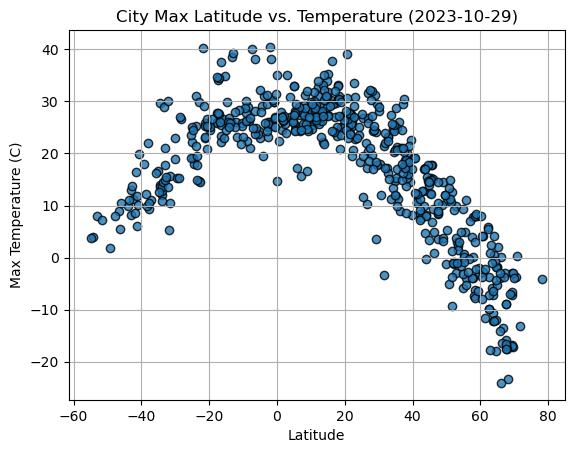

In [10]:
# Associate Latitude and temperature

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save 
plt.savefig("Temp_vs_Lat.png")

# Show plot
plt.show()

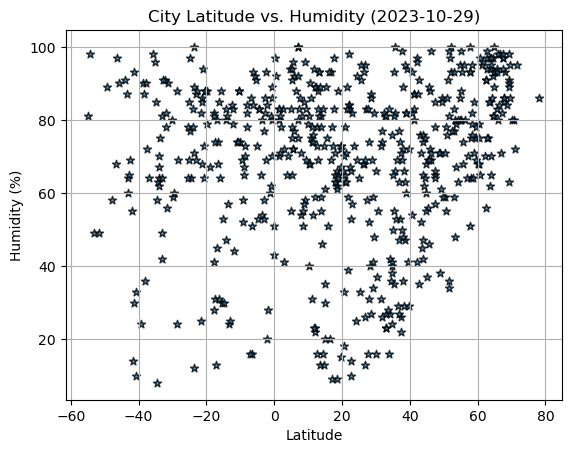

In [11]:
# Associate Latitude and humidity

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="*", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save
plt.savefig("Humidity_vs_Lat.png")

# Show plot
plt.show()

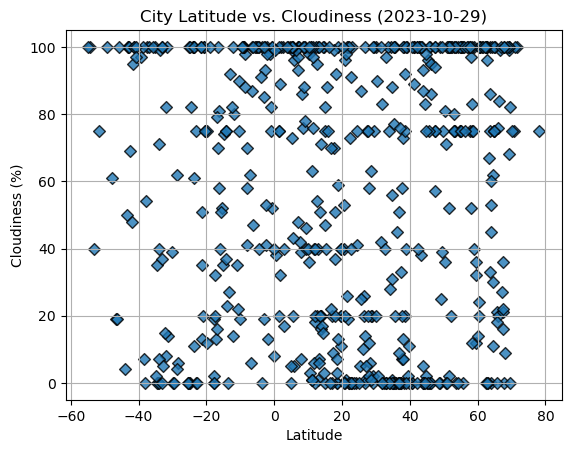

In [12]:
# Associate Latitude and cloudiness

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="D", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save 
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

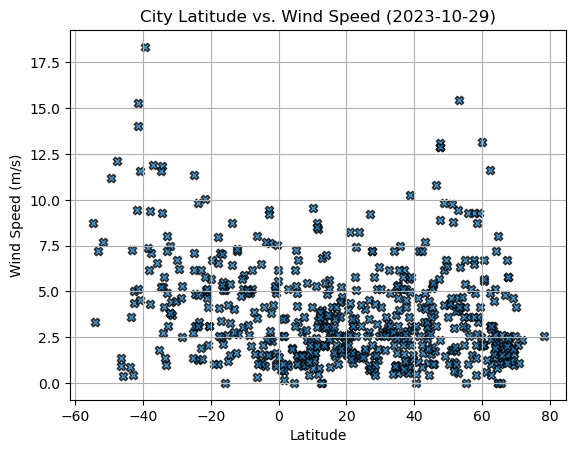

In [13]:
# Associate Latitude and wind speed

plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="X", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("Windspeed_vs_Lat.png")

# Show plot
plt.show()

In [14]:
# Regression analysis for each of the pairs above.

# Define a function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    plt.show()

In [15]:
# Create Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,utrik,11.2278,169.8474,28.20,78,63,8.71,MH,1698604371
3,mugia,43.1041,-9.2179,12.73,76,100,7.69,ES,1698604371
4,fort bragg,35.1390,-79.0060,28.79,50,0,4.63,US,1698604371
5,mehtar lam,34.6714,70.2094,20.20,38,1,1.00,AF,1698604372
6,rikaze,29.2500,88.8833,3.58,59,2,1.23,CN,1698604372


In [16]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.90,91,4,0.89,NZ,1698604370
2,goianesia,-15.3175,-49.1175,34.87,30,52,2.64,BR,1698604371
12,saint-philippe,-21.3585,55.7679,25.77,86,51,4.89,RE,1698604373
15,adamstown,-25.0660,-130.1015,22.23,85,100,7.09,PN,1698604374
17,kerikeri,-35.2268,173.9474,16.62,96,100,1.79,NZ,1698604375


The r-squared value is: 0.7842544773123635
The r value is: -0.8855814346023541


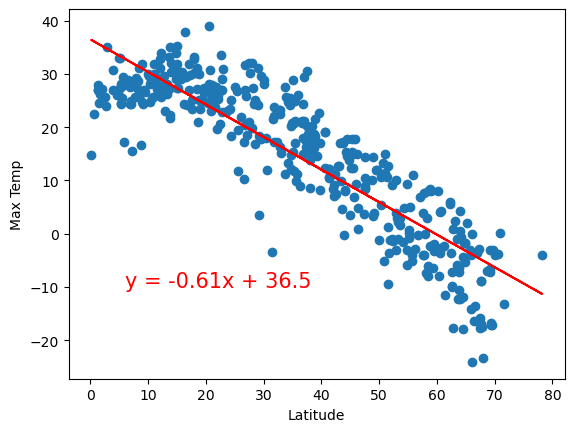

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-squared value is: 0.6036456261689475
The r value is: 0.7769463470336594


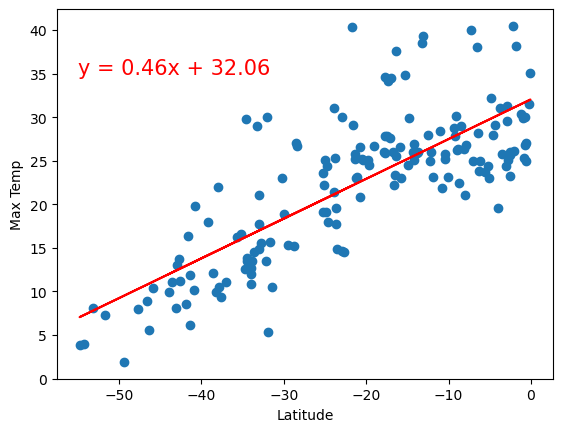

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

The r-squared value is: 0.055870366856194106
The r value is: 0.23636913262140238


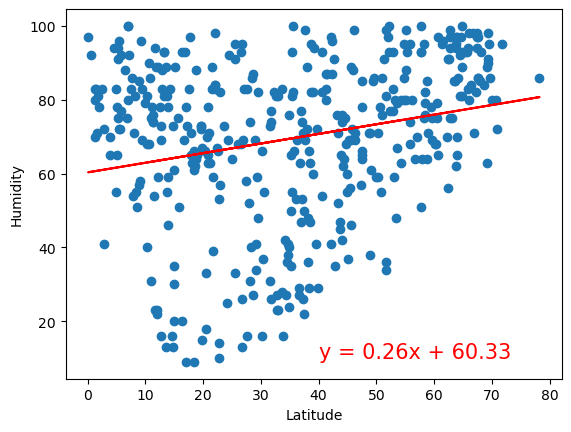

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-squared value is: 3.0421428805130275e-05
The r value is: -0.005515562419656791


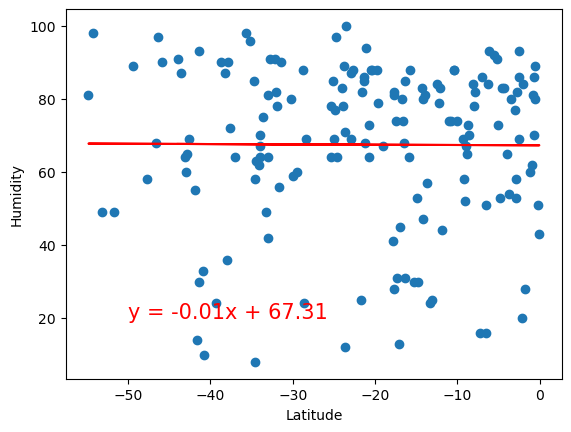

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

The r-squared value is: 0.012199932669270197
The r value is: 0.11045330537955936


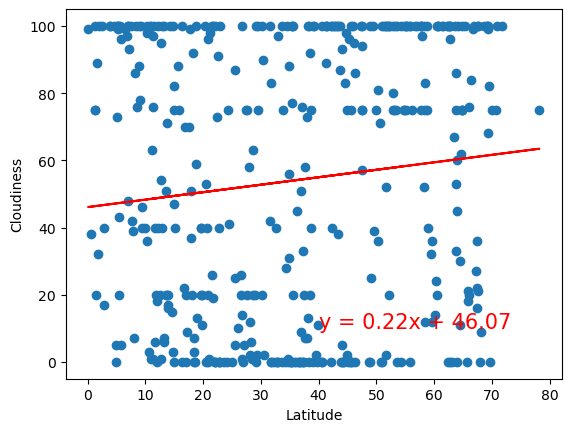

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-squared value is: 0.0068727880018439325
The r value is: 0.08290227983501981


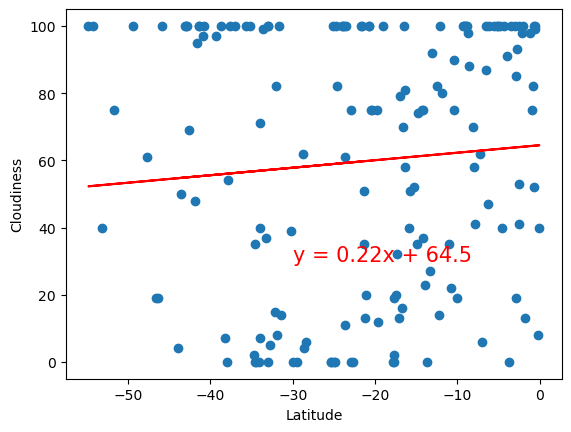

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

The r-squared value is: 0.010543743859943848
The r value is: 0.1026827339913768


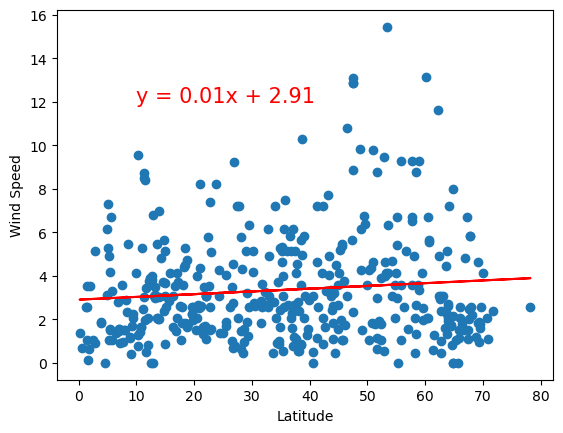

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-squared value is: 0.09261649303840559
The r value is: -0.3043295796310401


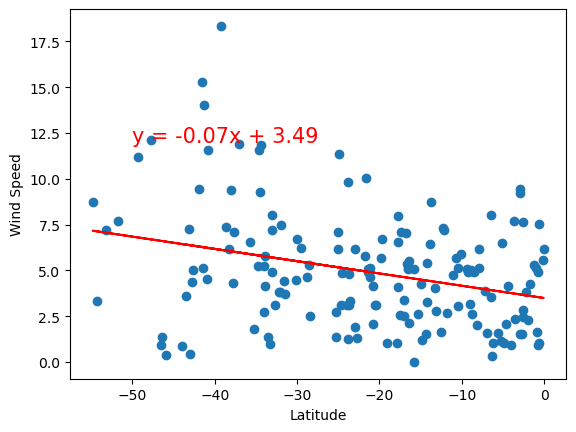

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))